Importar Bibliotecas

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
 
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


Dados Bovespa e Dólar

In [8]:
tickers = ["^BVSP", "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [11]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2021-02-09,5.3643,119429.000000
2021-02-10,5.3767,118430.000000
2021-02-11,5.3849,119235.000000


Renomeando Colunas

In [14]:
carteira.columns = ["Dólar", "IBOV"]
carteira

,Dólar,IBOV
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2021-02-09,5.3643,119429.000000
2021-02-10,5.3767,118430.000000
2021-02-11,5.3849,119235.000000


Mostrando Gráficos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f700c617f60>,
      dtype=object)

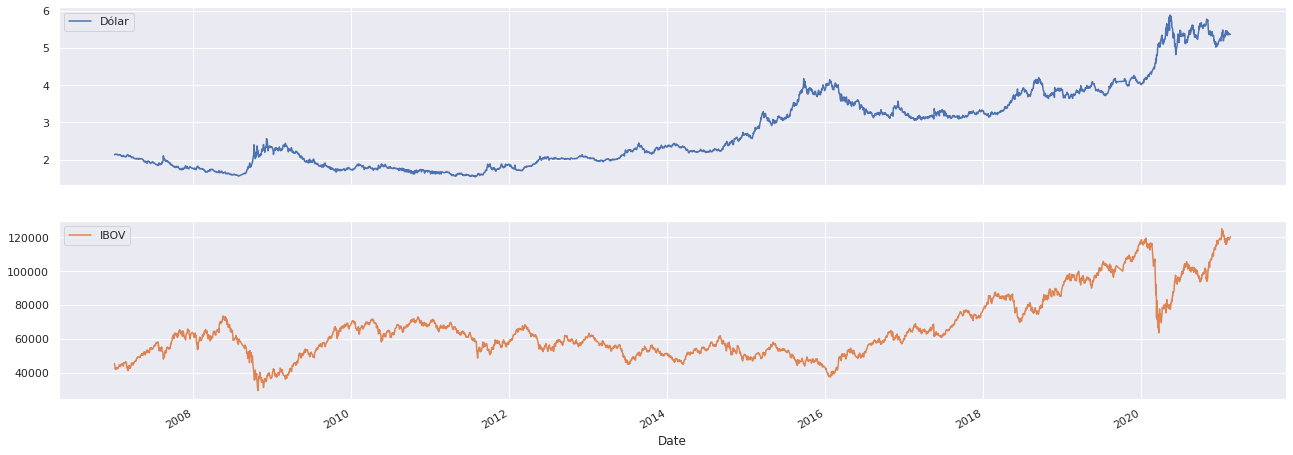

In [17]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

Mostrando Correlação Dólar Bovespa

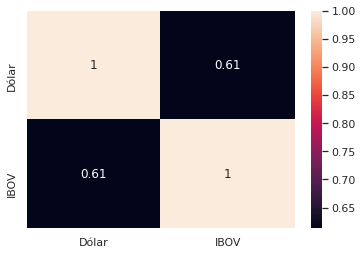

In [20]:
sns.heatmap(carteira.corr(), annot=True)

Mostrando Correlação Dólar Bovespa no Gráfico

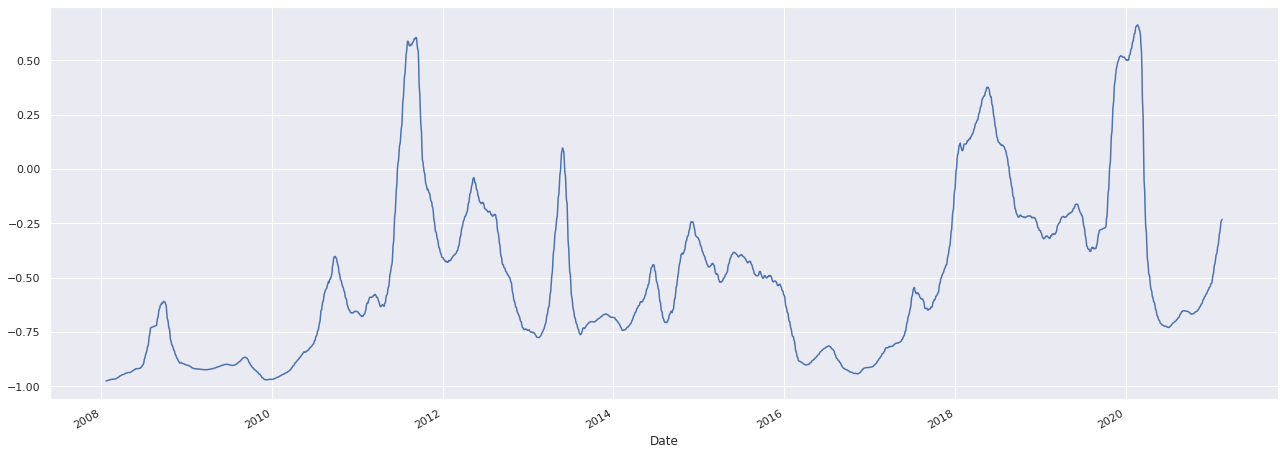

In [21]:
carteira ["Dólar"].rolling(257).corr(carteira["IBOV"]).plot(figsize=(22,8))

IBOVESPA DOLARIZADO

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7003cfb898>],
      dtype=object)

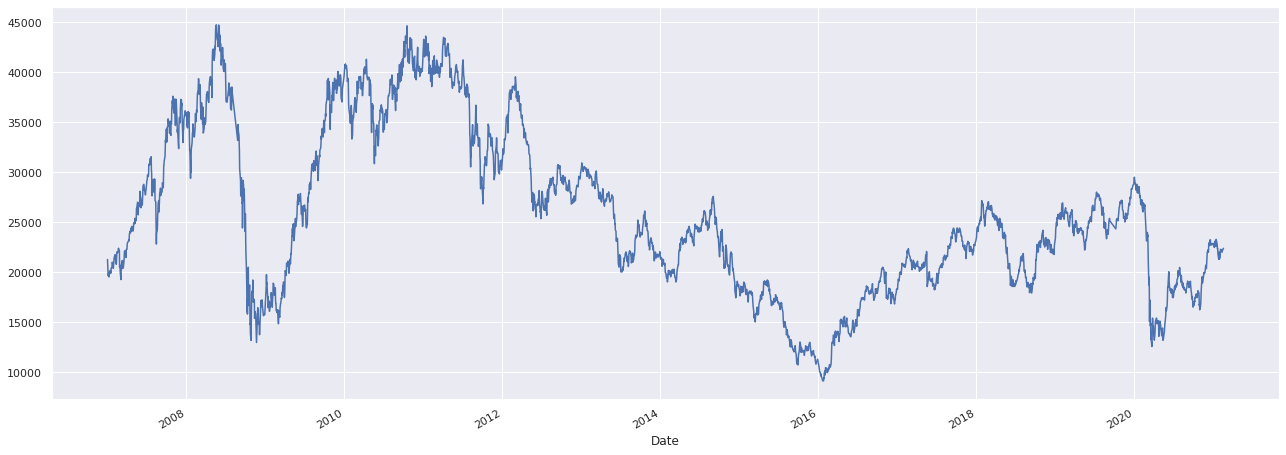

In [23]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"]/carteira["Dólar"])
carteira.IBOV_DOLARIZADO.plot(subplots=True, figsize=(22,8))